In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
data = pd.read_csv('../exp 1/penguins_lter.csv')

In [138]:
data.drop(columns=['studyName','Individual ID','Comments'], inplace=True)
data.head(1)

,Sample Number,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN


In [139]:
data.isna().sum()

Sample Number           0
Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [140]:
data_mean = data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].mean())

In [141]:
data_median = data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].median())

In [142]:
data_mode = data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Sex']].fillna(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Sex']].mode())

In [143]:
def compare(parameter):
    plt.figure(figsize=(10,6))
    
    plt.subplot(1,4,1)
    sns.kdeplot(data=data[parameter],color='red')
    sns.kdeplot(data=data_mean[parameter],color='blue')

    plt.subplot(1,4,2)
    sns.kdeplot(data=data[parameter],color='red')
    sns.kdeplot(data=data_median[parameter],color='yellow')

    plt.subplot(1,4,3)
    sns.kdeplot(data=data[parameter],color='red')
    sns.kdeplot(data=data_mode[parameter],color='green')

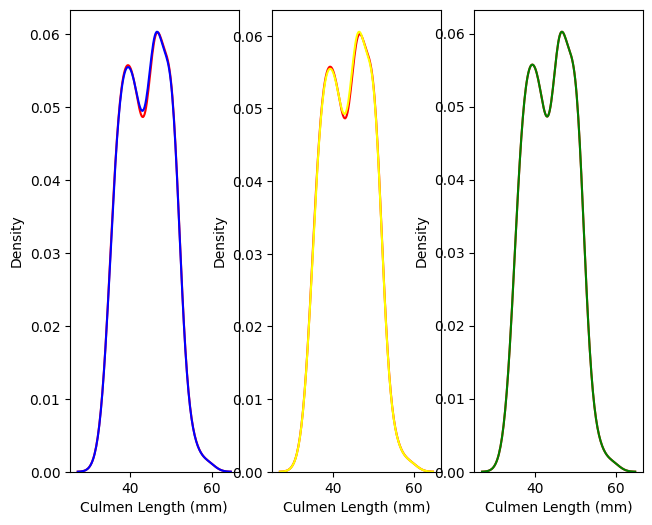

In [144]:
compare('Culmen Length (mm)')

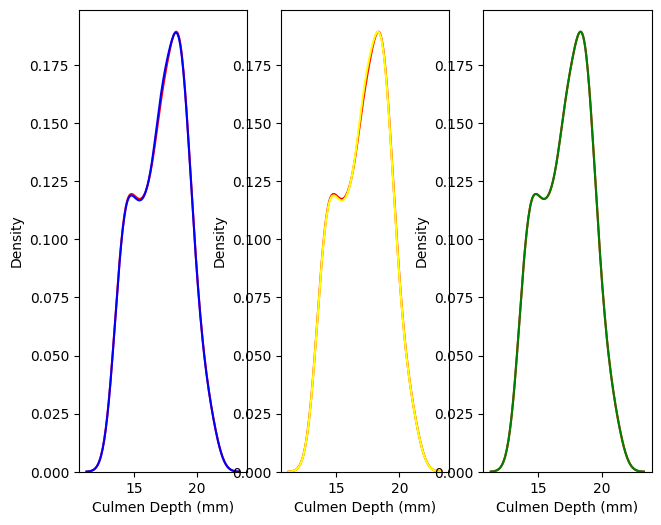

In [145]:
compare('Culmen Depth (mm)')

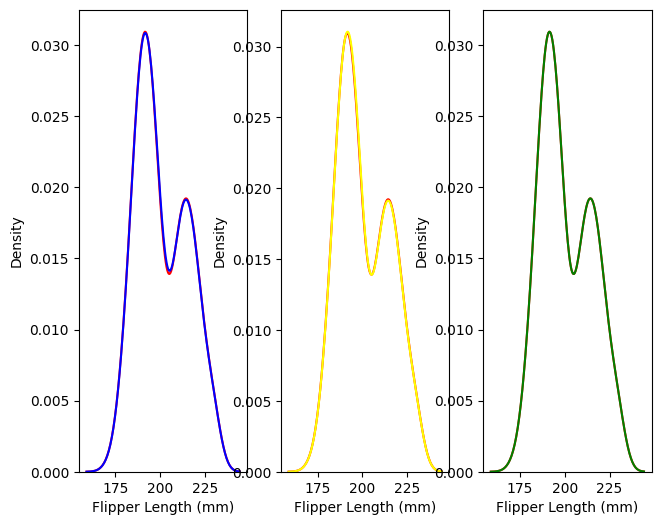

In [146]:
compare('Flipper Length (mm)')

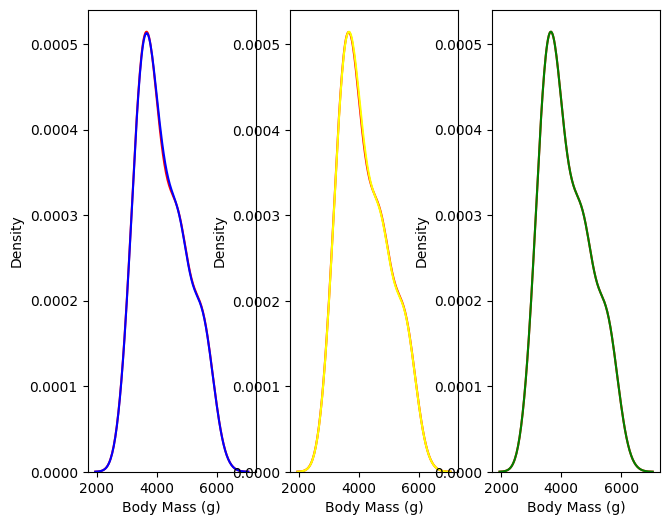

In [147]:
compare('Body Mass (g)')

### As we can see, using Mode to replace missing values produces least deviation from original data, hence, mode will be used as .fillna() parameter

In [148]:
data.fillna(data[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)','Sex']].mode(),inplace=True)

In [152]:
data[data['Delta 13 C (o/oo)'].isna()]

,Sample Number,Species,Region,Island,Stage,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
339,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
